In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import foursquare
import numpy as np
import pandas as pd
%matplotlib inline

# Crawling Foursquare data

In [2]:
# Network Idea: A friendship network can be built. Just extract the user_id of approximately 100 nodes and see
# how many total nodes are created in the friendship network. Target total nodes should be approximately 600.
# The resultant graph will have undirected edges.

In [3]:
# Construct the client object

client_id = "YFHDZ4PUO3E4QHEM1GPUQWK5G5FQTISFUODFUPIFI1LHQTLY"
client_secret = "5FWDGR5HTK0SU304NTKOBFIK32AN10XCJFKRU5IWSCXNZ0DL"

In [4]:
# Instantiating a client
# Userless Access
client = foursquare.Foursquare(client_id, client_secret)

In [5]:
json = client.users(USER_ID = '123455')

In [6]:
json

{'user': {'id': '123455',
  'firstName': 'Will',
  'lastName': 'Findlay',
  'gender': 'male',
  'canonicalUrl': 'https://foursquare.com/willswords',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/N355GIXGS2ERKKYP.jpg'},
  'friends': {'count': 52,
   'groups': [{'type': 'others',
     'name': 'Other friends',
     'count': 52,
     'items': [{'id': '2963',
       'firstName': 'Ryan',
       'lastName': 'Ozawa',
       'gender': 'male',
       'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
        'suffix': '/2963_ilJUiL2C_dtLwqPr4JC3_8-A6tNoo0wOhWYi8pMtOiecvJ5vwYYnrPeXqQFKGmYX5UTex2zi7'},
       'tips': {'count': 33},
       'lists': {'groups': [{'type': 'created', 'count': 4, 'items': []}]},
       'homeCity': 'Mililani, HI',
       'bio': 'Hawaii geek dad. Writing, editing, marketing, media relations, and the social web. #hawaii',
       'contact': {},
       'superuser': 2},
      {'id': '48182592',
       'firstName': 'Tim',
       'lastName': 'L

In [7]:
# Each user has the following attributes
json.get('user').keys()

dict_keys(['id', 'firstName', 'lastName', 'gender', 'canonicalUrl', 'photo', 'friends', 'tips', 'homeCity', 'bio', 'contact', 'photos', 'type', 'mayorships', 'checkins', 'lists', 'lenses'])

In [8]:
json.get('user').get('friends').keys()

dict_keys(['count', 'groups'])

In [9]:
json.get('user').get('friends').get('groups')[0].keys()

dict_keys(['type', 'name', 'count', 'items'])

In [10]:
json.get('user').get('friends').get('groups')[0].get('items')

[{'id': '2963',
  'firstName': 'Ryan',
  'lastName': 'Ozawa',
  'gender': 'male',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/2963_ilJUiL2C_dtLwqPr4JC3_8-A6tNoo0wOhWYi8pMtOiecvJ5vwYYnrPeXqQFKGmYX5UTex2zi7'},
  'tips': {'count': 33},
  'lists': {'groups': [{'type': 'created', 'count': 4, 'items': []}]},
  'homeCity': 'Mililani, HI',
  'bio': 'Hawaii geek dad. Writing, editing, marketing, media relations, and the social web. #hawaii',
  'contact': {},
  'superuser': 2},
 {'id': '48182592',
  'firstName': 'Tim',
  'lastName': 'Lucas',
  'gender': 'male',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/ZLYMTNI5MAPNDVV4.jpg'},
  'tips': {'count': 1},
  'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
  'homeCity': 'Clearfield, UT',
  'bio': '',
  'contact': {}},
 {'id': '42893142',
  'firstName': 'Gregory',
  'lastName': 'Johnson',
  'gender': 'male',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'su

In [11]:
type(json.get('user').get('friends').get('groups')[0].get('items')) # List of dictionaries

list

In [12]:
json.get('user').get('friends').get('groups')[0].get('items')[0]

{'id': '2963',
 'firstName': 'Ryan',
 'lastName': 'Ozawa',
 'gender': 'male',
 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
  'suffix': '/2963_ilJUiL2C_dtLwqPr4JC3_8-A6tNoo0wOhWYi8pMtOiecvJ5vwYYnrPeXqQFKGmYX5UTex2zi7'},
 'tips': {'count': 33},
 'lists': {'groups': [{'type': 'created', 'count': 4, 'items': []}]},
 'homeCity': 'Mililani, HI',
 'bio': 'Hawaii geek dad. Writing, editing, marketing, media relations, and the social web. #hawaii',
 'contact': {},
 'superuser': 2}

In [13]:
# This is how you get the details of a user's friends.
print(json.get('user').get('friends').get('groups')[0].get('items')[0].get('id'))
print(json.get('user').get('friends').get('groups')[0].get('items')[0].get('firstName'))
print(json.get('user').get('friends').get('groups')[0].get('items')[0].get('lastName'))
print(type(json.get('user').get('friends').get('groups')[0].get('items')[0].get('firstName')))

2963
Ryan
Ozawa
<class 'str'>


In [14]:
# Check Ryan Ozawa's friend list
client.users('2963')

{'user': {'id': '2963',
  'firstName': 'Ryan',
  'lastName': 'Ozawa',
  'gender': 'male',
  'canonicalUrl': 'https://foursquare.com/hawaii',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/2963_ilJUiL2C_dtLwqPr4JC3_8-A6tNoo0wOhWYi8pMtOiecvJ5vwYYnrPeXqQFKGmYX5UTex2zi7'},
  'friends': {'count': 999,
   'groups': [{'type': 'others',
     'name': 'Other friends',
     'count': 999,
     'items': [{'id': '51118',
       'firstName': 'Nicholas',
       'lastName': 'A',
       'gender': 'male',
       'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
        'suffix': '/ZPVKTLV305IIBKA3.jpg'},
       'tips': {'count': 25},
       'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
       'homeCity': 'Honolulu, HI',
       'bio': 'Foursquare user 51118',
       'contact': {},
       'superuser': 2},
      {'id': '103001',
       'firstName': 'Ryan',
       'gender': 'male',
       'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       

In [15]:
# Getting friends of a user directly by using USER_ID
friends_json = client.users.friends(USER_ID = '123455')

In [16]:
friends_json

{'friends': {'count': 52,
  'items': [{'id': '11560556',
    'firstName': 'James',
    'lastName': 'McDougal',
    'gender': 'male',
    'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
     'suffix': '/DXA21G1R5UW2PCWV.jpg'},
    'tips': {'count': 6},
    'lists': {'groups': [{'type': 'created', 'count': 3, 'items': []}]},
    'homeCity': 'Syracuse, UT',
    'bio': 'From transportation to IT to small business (sales) to PT & Pain Mgmt (sales) to business ownership (aesthetics) its been quite a ride.',
    'contact': {}},
   {'id': '8306193',
    'firstName': 'Jo',
    'lastName': 'Killian',
    'gender': 'female',
    'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
     'suffix': '/EA2LGJDYW2XBI3YS.jpg'},
    'tips': {'count': 2},
    'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
    'homeCity': 'Sandy, UT',
    'bio': '',
    'contact': {}},
   {'id': '7056742',
    'firstName': 'Lesley',
    'lastName': 'Heizman',
    'gender': 'female',
    '

In [17]:
friends_json.get('friends')

{'count': 52,
 'items': [{'id': '11560556',
   'firstName': 'James',
   'lastName': 'McDougal',
   'gender': 'male',
   'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
    'suffix': '/DXA21G1R5UW2PCWV.jpg'},
   'tips': {'count': 6},
   'lists': {'groups': [{'type': 'created', 'count': 3, 'items': []}]},
   'homeCity': 'Syracuse, UT',
   'bio': 'From transportation to IT to small business (sales) to PT & Pain Mgmt (sales) to business ownership (aesthetics) its been quite a ride.',
   'contact': {}},
  {'id': '8306193',
   'firstName': 'Jo',
   'lastName': 'Killian',
   'gender': 'female',
   'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
    'suffix': '/EA2LGJDYW2XBI3YS.jpg'},
   'tips': {'count': 2},
   'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
   'homeCity': 'Sandy, UT',
   'bio': '',
   'contact': {}},
  {'id': '7056742',
   'firstName': 'Lesley',
   'lastName': 'Heizman',
   'gender': 'female',
   'photo': {'prefix': 'https://fastly.4sqi

In [18]:
friends_json.get('friends').get('items')

[{'id': '11560556',
  'firstName': 'James',
  'lastName': 'McDougal',
  'gender': 'male',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/DXA21G1R5UW2PCWV.jpg'},
  'tips': {'count': 6},
  'lists': {'groups': [{'type': 'created', 'count': 3, 'items': []}]},
  'homeCity': 'Syracuse, UT',
  'bio': 'From transportation to IT to small business (sales) to PT & Pain Mgmt (sales) to business ownership (aesthetics) its been quite a ride.',
  'contact': {}},
 {'id': '8306193',
  'firstName': 'Jo',
  'lastName': 'Killian',
  'gender': 'female',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/EA2LGJDYW2XBI3YS.jpg'},
  'tips': {'count': 2},
  'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
  'homeCity': 'Sandy, UT',
  'bio': '',
  'contact': {}},
 {'id': '7056742',
  'firstName': 'Lesley',
  'lastName': 'Heizman',
  'gender': 'female',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/GPFYODGP5CJPFPQW.j

In [19]:
friends_json.get('friends').get('items')[0].get('id')

'11560556'

In [20]:
# Tips (Reviews) for a place by user, using USER_ID.
client.users.tips(USER_ID = '123455')

{'tips': {'count': 1,
  'items': [{'id': '4c524d8f2d51952195e03c90',
    'createdAt': 1280462223,
    'text': 'The free tour of the Flaming Gorge Reservoir Dam nearby is great, especially for kids.',
    'type': 'user',
    'canonicalUrl': 'https://foursquare.com/item/4c524d8f2d51952195e03c90',
    'likes': {'count': 0, 'groups': []},
    'logView': True,
    'agreeCount': 0,
    'disagreeCount': 0,
    'todo': {'count': 0},
    'venue': {'id': '4c1443adb7b9c928af26ab37',
     'name': 'Mustang Ridge',
     'location': {'address': 'Unnamed Rd',
      'lat': 40.92577038937777,
      'lng': -109.4388484954834,
      'labeledLatLngs': [{'label': 'display',
        'lat': 40.92577038937777,
        'lng': -109.4388484954834}],
      'postalCode': '84023',
      'cc': 'US',
      'city': 'Dutch John',
      'state': 'UT',
      'country': 'United States',
      'formattedAddress': ['Unnamed Rd',
       'Dutch John, UT 84023',
       'United States']},
     'categories': [{'id': '4bf58dd8d489

#                                    Graphs using NetworkX

In [21]:
g = nx.Graph() # Empty graph

In [22]:
# One node at a time
g.add_node(1)

# A list of nodes
g.add_nodes_from([2, 3])

# A container of nodes
h = nx.path_graph(5)
g.add_nodes_from(h)

In [23]:
g.nodes

NodeView((1, 2, 3, 0, 4))

In [24]:
# You can also remove any node of the graph
g.remove_node(2)

In [25]:
g.nodes

NodeView((1, 3, 0, 4))

In [26]:
# A node can be any hashable object such as a string, a function, a file and more.
import math
g.add_node('string')
g.add_node(math.cos)

In [27]:
g.nodes

NodeView((1, 3, 0, 4, 'string', <built-in function cos>))

In [28]:
# Single edge
g.add_edge(1, 2)  # Adds an edge from u to v, i.e. 1--2
e = (2, 3)
g.add_edge(*e)

In [29]:
# List of edges
g.add_edges_from([(1, 2), (1, 3)])

# A container of edges
g.add_edges_from(h.edges())

In [30]:
g.edges

EdgeView([(1, 2), (1, 3), (1, 0), (3, 2), (3, 4)])

In [31]:
g.remove_edge(1, 2)

In [32]:
g.edges()

EdgeView([(1, 3), (1, 0), (3, 2), (3, 4)])

In [33]:
print(g.number_of_nodes())   # also g.order()
print(g.number_of_edges())   # also g.size()
 
print(g.order())
print(g.size())

7
4
7
4


In [34]:
# Finding the degree of a node
g.degree(1)  # Two edges: (1, 3) and (1, 0)

2

In [35]:
g.add_node(1, time = '10am') # Here '1' becomes the node representator and the dictionary becomes the actual
# node value

In [36]:
g.nodes[1]

{'time': '10am'}

In [37]:
g.nodes[1]['time']

'10am'

In [38]:
# Weighted edges
g.add_edge(1, 2, weight=4.0)

In [39]:
g[1][2]

{'weight': 4.0}

In [40]:
g.edges(data=True)

EdgeDataView([(1, 3, {}), (1, 0, {}), (1, 2, {'weight': 4.0}), (3, 2, {}), (3, 4, {})])

In [41]:
# Node iterator
g.add_edge(1, 2)
for node in g.nodes():
    print (node, g.degree(node))

1 3
3 3
0 1
4 1
string 0
<built-in function cos> 0
2 2


In [42]:
# Edge iterator
g.add_edge(1, 3, weight = 1.5)
for u, v, attr in g.edges(data=True):
    print (u, v, attr)

1 3 {'weight': 1.5}
1 0 {}
1 2 {'weight': 4.0}
3 2 {}
3 4 {}


In [43]:
g.add_node(10, name = 'Steve')
g.add_node(11, name = 'Zoey') 

In [44]:
g.nodes(data=True) # Each node can have data associated with it.

NodeDataView({1: {'time': '10am'}, 3: {}, 0: {}, 4: {}, 'string': {}, <built-in function cos>: {}, 2: {}, 10: {'name': 'Steve'}, 11: {'name': 'Zoey'}})

# Drawing Graphs

In [45]:
""" NetworkX is not primarily a graph drawing package but it provides basic drawing capabilites by
using matplotlib. For more complex visualization techniques it provides an interface to use the open source 
GraphViz software package. """

' NetworkX is not primarily a graph drawing package but it provides basic drawing capabilites by\nusing matplotlib. For more complex visualization techniques it provides an interface to use the open source \nGraphViz software package. '

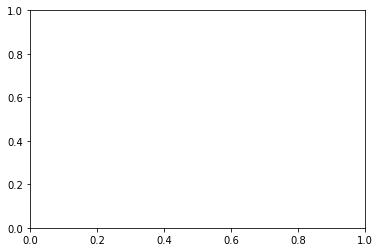

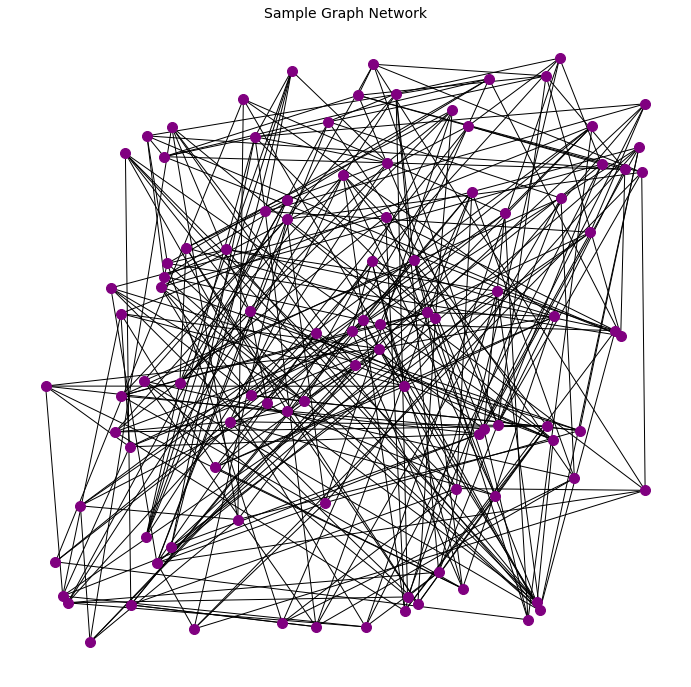

In [68]:
import pylab as plt  # import matplotlib plotting interface
G = nx.watts_strogatz_graph(100, 7, 0.1)
plt.subplot(1, 1, 1)
plt.figure(figsize = (12, 12))
plt.title('Sample Graph Network', fontdict = {'fontsize': 14})
nx.draw(G, pos = nx.random_layout(G), node_color = 'purple', node_size = 100, 
        edge_color = 'black', node_shape = 'o')
plt.savefig('sampleNetwork.png')

In [47]:
# How to create a graph using dictionaries
nodeList = np.arange(1, 5) # Should be a list
edgeList = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)]

In [48]:
sampleGraph = nx.Graph()

In [49]:
sampleGraph.add_nodes_from(nodeList)
sampleGraph.add_edges_from(edgeList)

In [50]:
# The below dictionary is going to lay the foundation of your structure of the extracted data
usefulDict = {'User_ID': 123455, 'Name': 'Nicholas', 'Count': 3, 
             'Friends': [{'User_ID': 1, 'Name': 'Sam Smith'},
                         {'User_ID': 2, 'Name': 'John Rambo'}, 
                        {'User_ID': 3, 'Name': 'Taylor Swift'}]
             }
# Single User

In [51]:
for value in usefulDict.get('Friends'):
    print(value.get('Name'))

Sam Smith
John Rambo
Taylor Swift


In [52]:
# Multi-user
anotherDict = [{'User_ID': 123455, 
                'Name': 'Nicholas', 
                'Count': 3, 
                'Friends': [{'User_ID': 1, 'Name': 'Sam Smith'},
                           {'User_ID': 2, 'Name': 'John Rambo'}, 
                          {'User_ID': 3, 'Name': 'Taylor Swift'}]
               },
              
               {'User_ID': 123456, 
                'Name': 'Nicholas', 
                'Count': 3, 
                'Friends': [{'User_ID': 4, 'Name': 'Sam Smith'},
                           {'User_ID': 5, 'Name': 'John Rambo'}, 
                          {'User_ID': 6, 'Name': 'Taylor Swift'}]
               },
               
               {'User_ID': 123457, 
                'Name': 'Nicholas', 
                'Count': 3, 
                'Friends': [{'User_ID': 7, 'Name': 'Sam Smith'},
                           {'User_ID': 8, 'Name': 'John Rambo'}, 
                           {'User_ID': 9, 'Name': 'Taylor Swift'}]
               }]

In [53]:
anotherDict[0].get('Friends')

[{'User_ID': 1, 'Name': 'Sam Smith'},
 {'User_ID': 2, 'Name': 'John Rambo'},
 {'User_ID': 3, 'Name': 'Taylor Swift'}]

In [54]:
anotherDict[1].get('Friends')

[{'User_ID': 4, 'Name': 'Sam Smith'},
 {'User_ID': 5, 'Name': 'John Rambo'},
 {'User_ID': 6, 'Name': 'Taylor Swift'}]

In [55]:
for x in anotherDict[1].get('Friends'):
    print(x.get('User_ID'))

4
5
6


In [56]:
dictionary = {}

In [57]:
dictionary['FirstName'] = 'Jadav'
dictionary['LastName'] = 'Steve'
dictionary['age'] = None

In [58]:
dictionary

{'FirstName': 'Jadav', 'LastName': 'Steve', 'age': None}

# Back to Foursquare

In [59]:
friends_json = client.users.friends(USER_ID = '123455')

In [60]:
friends_json.keys()

dict_keys(['friends', 'checksum'])

In [61]:
friends_json.get('friends').keys()

dict_keys(['count', 'items'])

In [62]:
friends_json.get('friends').get('items') # This is a list object. Each value of this list shows
# information about each of friend.

[{'id': '11560556',
  'firstName': 'James',
  'lastName': 'McDougal',
  'gender': 'male',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/DXA21G1R5UW2PCWV.jpg'},
  'tips': {'count': 6},
  'lists': {'groups': [{'type': 'created', 'count': 3, 'items': []}]},
  'homeCity': 'Syracuse, UT',
  'bio': 'From transportation to IT to small business (sales) to PT & Pain Mgmt (sales) to business ownership (aesthetics) its been quite a ride.',
  'contact': {}},
 {'id': '8306193',
  'firstName': 'Jo',
  'lastName': 'Killian',
  'gender': 'female',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/EA2LGJDYW2XBI3YS.jpg'},
  'tips': {'count': 2},
  'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
  'homeCity': 'Sandy, UT',
  'bio': '',
  'contact': {}},
 {'id': '7056742',
  'firstName': 'Lesley',
  'lastName': 'Heizman',
  'gender': 'female',
  'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
   'suffix': '/GPFYODGP5CJPFPQW.j

In [63]:
for x in friends_json.get('friends').get('items'):
    print (x.get('id'), x.get('firstName'), x.get('lastName'))

11560556 James McDougal
8306193 Jo Killian
7056742 Lesley Heizman
8525852 Nathan Howe
11698403 Sara Meyers
102337 Dennis Wales
11401785 Casey None
7609998 Eric Rowley
17350075 Jason Merrill
8960744 Brian Carter
8132902 Meredith Rowley
1936704 Michael Beaton
2260362 Joni Craner
4656009 Eric Wadsworth
42893142 Gregory Johnson
42914739 Gerri McGowan
215945 Thomas Sanchez
224083 Vince None
226867 SLAB pizza
2518127 @umckalumni None
2900434 Josh Bodiford
4802454 Aaron Houssian
48182592 Tim Lucas
6591631 Judy Unrein
89277 Allen Blair
198056 Buck Sommerkamp
198679 Miles Coleman
320318 Patrick Franks
1089488 Amanda Mitchell
1946412 Marc Miner
13983534 Zachary West
250903 Aimee Gromowsky
588865 Pip None
2963 Ryan Ozawa
24107 Paul Mayne
62100 Luke Schnoebelen
62175 Mike Hochanadel
73039 Leigh McBain
75566 Jake Gundersen
471167 Marianne Mercer
549371 Barefoot Michael None
3545091 James Clarke
152153 AJ None
162280 Corey Shields
843753 Kelly Hall
1145589 K Taube
1625707 Joni Craner
4163619 Rovy Br

In [65]:
# Prototype:
# client.users('USER_ID').get('user').get('id')
# client.users('USER_ID').get('user').get('firstName')
# client.users('USER_ID').get('user').get('lastName')
# client.users('USER_ID').get('user').get('friends').get('count')
# client.users.friends('USER_ID').get('friends').get('items').get('id')

In [92]:
def crawler(User_ID):
    """ Takes the user id of some user. This id is used 
    as a start id for the crawler. It takes all the friends of 
    the passed User_ID and then continues by adding friends of 
    friends of friends. """
    
    network_data = []  # You will need to append dictionaries to this empty list for each user.
    current_user = {}
    
    user = client.users(USER_ID = User_ID)
    user_friends = client.users.friends(USER_ID = User_ID)

    current_user['User_ID'] = user.get('user').get('id')
    current_user['Name'] = user.get('user').get('firstName') + ' ' + user.get('user').get('lastName')
    current_user['Friend count'] = user.get('user').get('friends').get('count')
    current_user['Friends'] = []

    for x in user_friends.get('friends').get('items'):

        if ('lastName' not in x):
            current_user['Friends'].append({'User_ID': x.get('id'), 'Name': x.get('firstName')})

        elif (x.get('lastName') is None):
            current_user['Friends'].append({'User_ID': x.get('id'), 'Name': x.get('firstName')})

        else:    
            current_user['Friends'].append({'User_ID': x.get('id'), 'Name': x.get('firstName') + ' ' + x.get('lastName')})
            
    network_data.append(current_user)
    
    return (network_data)
    

if __name__ == '__main__':
    
    user_id = int(input('Enter a user_id: '))
    network_data = crawler(user_id)
    

Enter a user_id: 11560556


In [93]:
network_data

[{'User_ID': '11560556',
  'Name': 'James McDougal',
  'Friend count': 22,
  'Friends': [{'User_ID': '58149219', 'Name': 'Tyler Goucher'},
   {'User_ID': '11586543', 'Name': 'James McDougal'},
   {'User_ID': '11610196', 'Name': 'Nita Thompson'},
   {'User_ID': '6307627', 'Name': 'Robert Todd Kendell'},
   {'User_ID': '21387990', 'Name': 'Isaac Thomas'},
   {'User_ID': '299061', 'Name': 'Roy Cole'},
   {'User_ID': '11732661', 'Name': 'N Lopez'},
   {'User_ID': '209604', 'Name': 'Scott Kimball'},
   {'User_ID': '10738394', 'Name': 'Mimi Michael'},
   {'User_ID': '12060322', 'Name': 'Jennifer Warnas'},
   {'User_ID': '11123069', 'Name': 'Bruce Sweeten'},
   {'User_ID': '28269033', 'Name': 'Scott Burke'},
   {'User_ID': '48332814', 'Name': 'Brian Child'},
   {'User_ID': '1663577', 'Name': 'Kristine Paul'},
   {'User_ID': '123455', 'Name': 'Will Findlay'},
   {'User_ID': '147282', 'Name': 'Chris Mayfield'},
   {'User_ID': '148710', 'Name': 'ReeD'},
   {'User_ID': '10645769', 'Name': 'Mike S